In [79]:
# Heart Failure Prediction

In [80]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [81]:
data_fr = pd.read_csv('data.csv')

In [82]:
data_fr.shape

(299, 13)

In [83]:
data_fr.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [84]:
data_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [85]:
data_fr.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

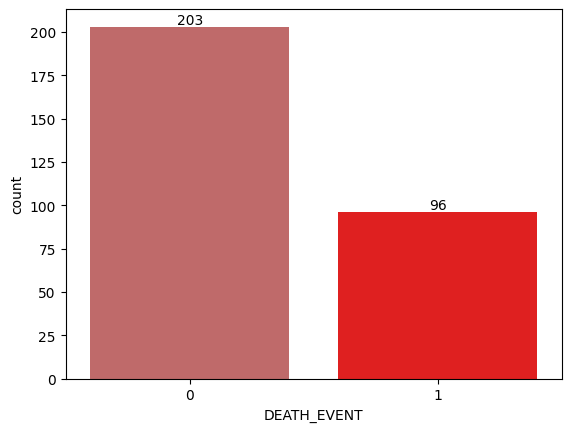

In [86]:
import seaborn as sns;
cols= ["#CD5C5C","#FF0000"];
ax = sns.countplot(x= data_fr["DEATH_EVENT"],palette= cols);
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);


In [87]:
data_fr.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


[Text(0.5, 0, 'AGE')]

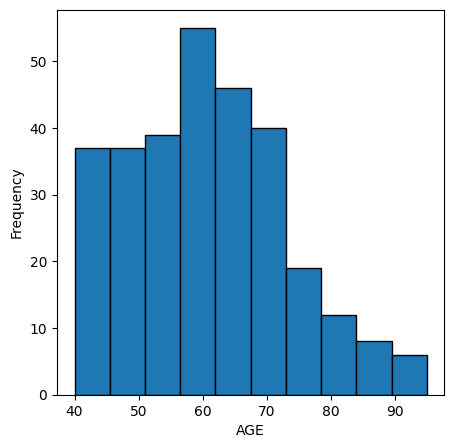

In [88]:
ax = (data_fr['age']).plot.hist(figsize=(5, 5),edgecolor='black')
ax.set(xlabel="AGE")


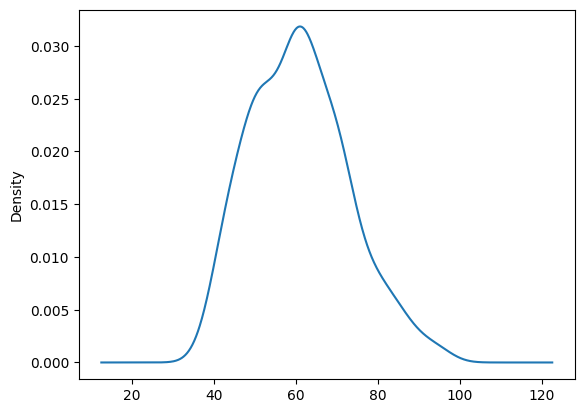

In [89]:
ax = (data_fr['age']).plot.kde()

[Text(0.5, 0, 'creatinine_phosphokinase')]

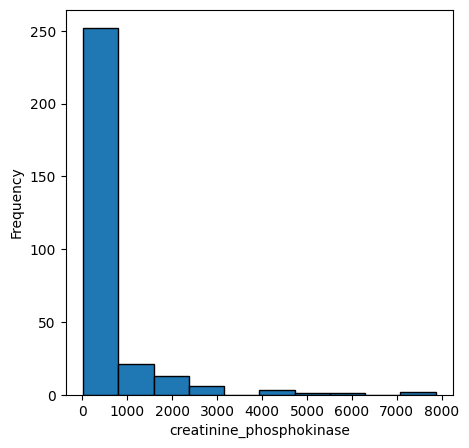

In [90]:
ax = (data_fr['creatinine_phosphokinase']).plot.hist(figsize=(5, 5),edgecolor='black')
ax.set(xlabel="creatinine_phosphokinase")

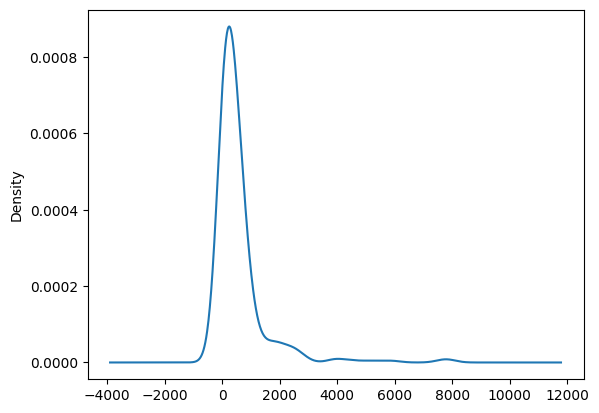

In [91]:
ax = (data_fr['creatinine_phosphokinase']).plot.kde()

[Text(0.5, 0, 'ejection_fraction')]

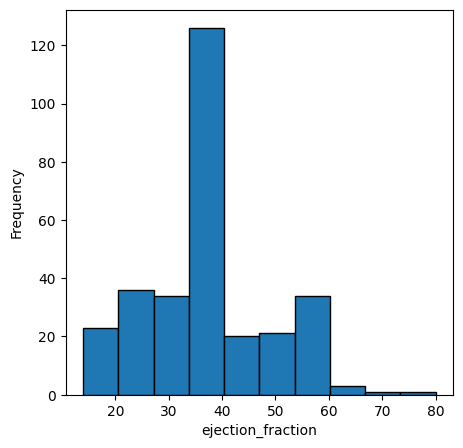

In [92]:
ax = (data_fr['ejection_fraction']).plot.hist(figsize=(5, 5),edgecolor='black')
ax.set(xlabel="ejection_fraction")

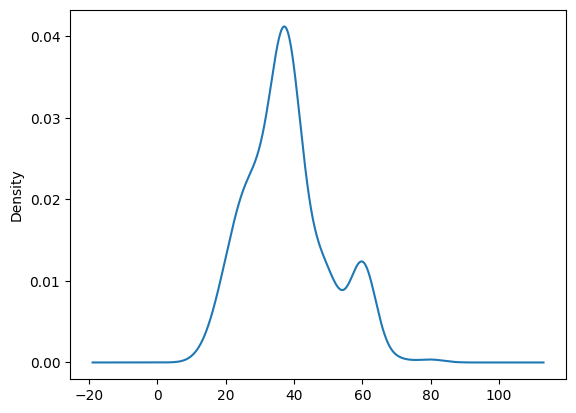

In [93]:
ax = (data_fr['ejection_fraction']).plot.kde()

[Text(0.5, 0, 'platelets')]

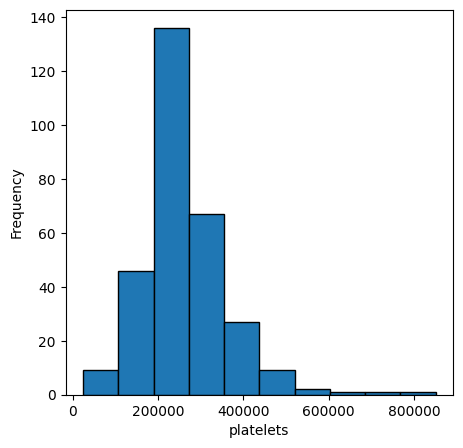

In [94]:
ax = (data_fr['platelets']).plot.hist(figsize=(5, 5),edgecolor='black')
ax.set(xlabel="platelets")


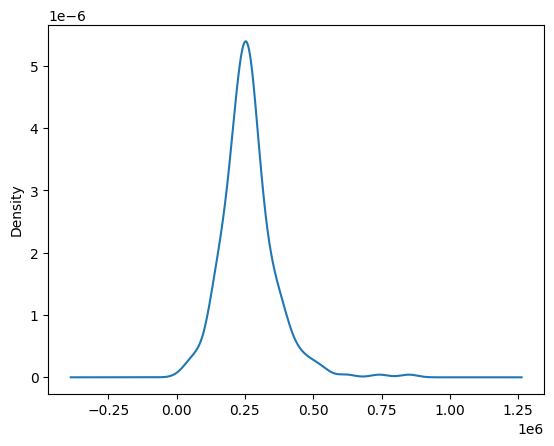

In [95]:
ax = (data_fr['platelets']).plot.kde()

[Text(0.5, 0, 'serum_creatinine')]

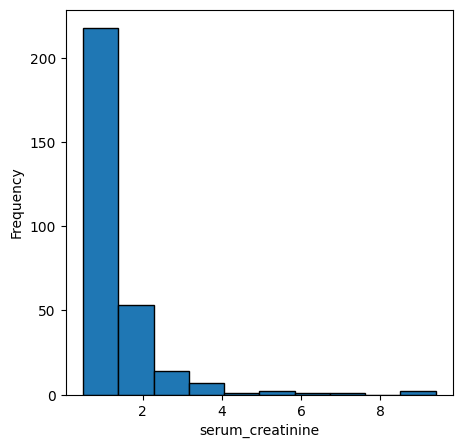

In [96]:
ax = (data_fr['serum_creatinine']).plot.hist(figsize=(5, 5),edgecolor='black')
ax.set(xlabel="serum_creatinine")


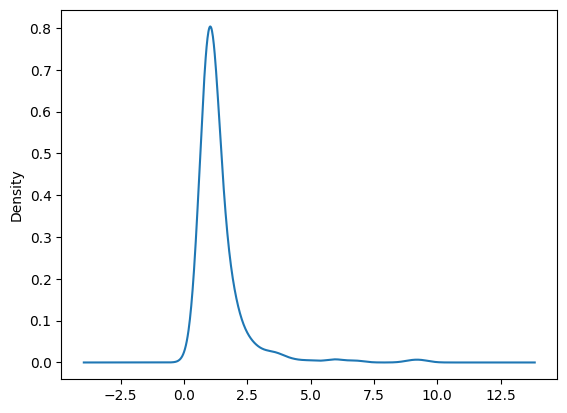

In [97]:
ax = (data_fr['serum_creatinine']).plot.kde()

[Text(0.5, 0, 'serum_sodium')]

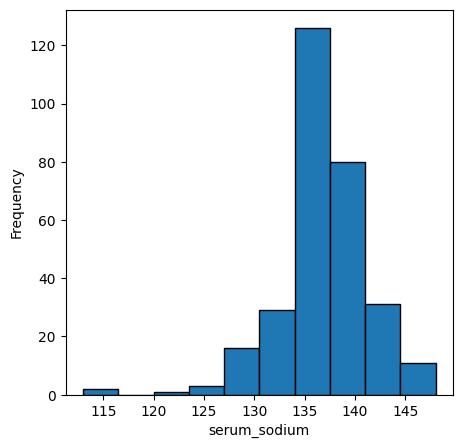

In [98]:
ax = (data_fr['serum_sodium']).plot.hist(figsize=(5, 5),edgecolor='black')
ax.set(xlabel="serum_sodium")


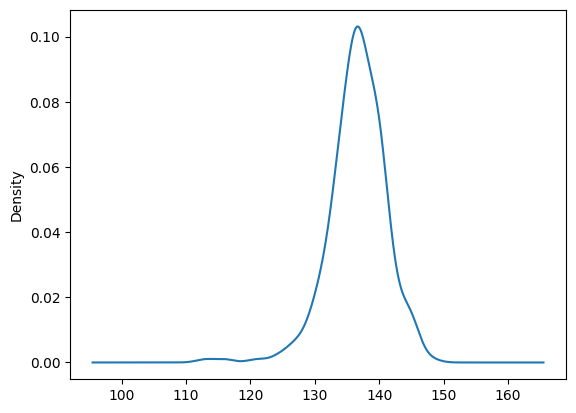

In [99]:
ax = (data_fr['serum_sodium']).plot.kde()

<Axes: >

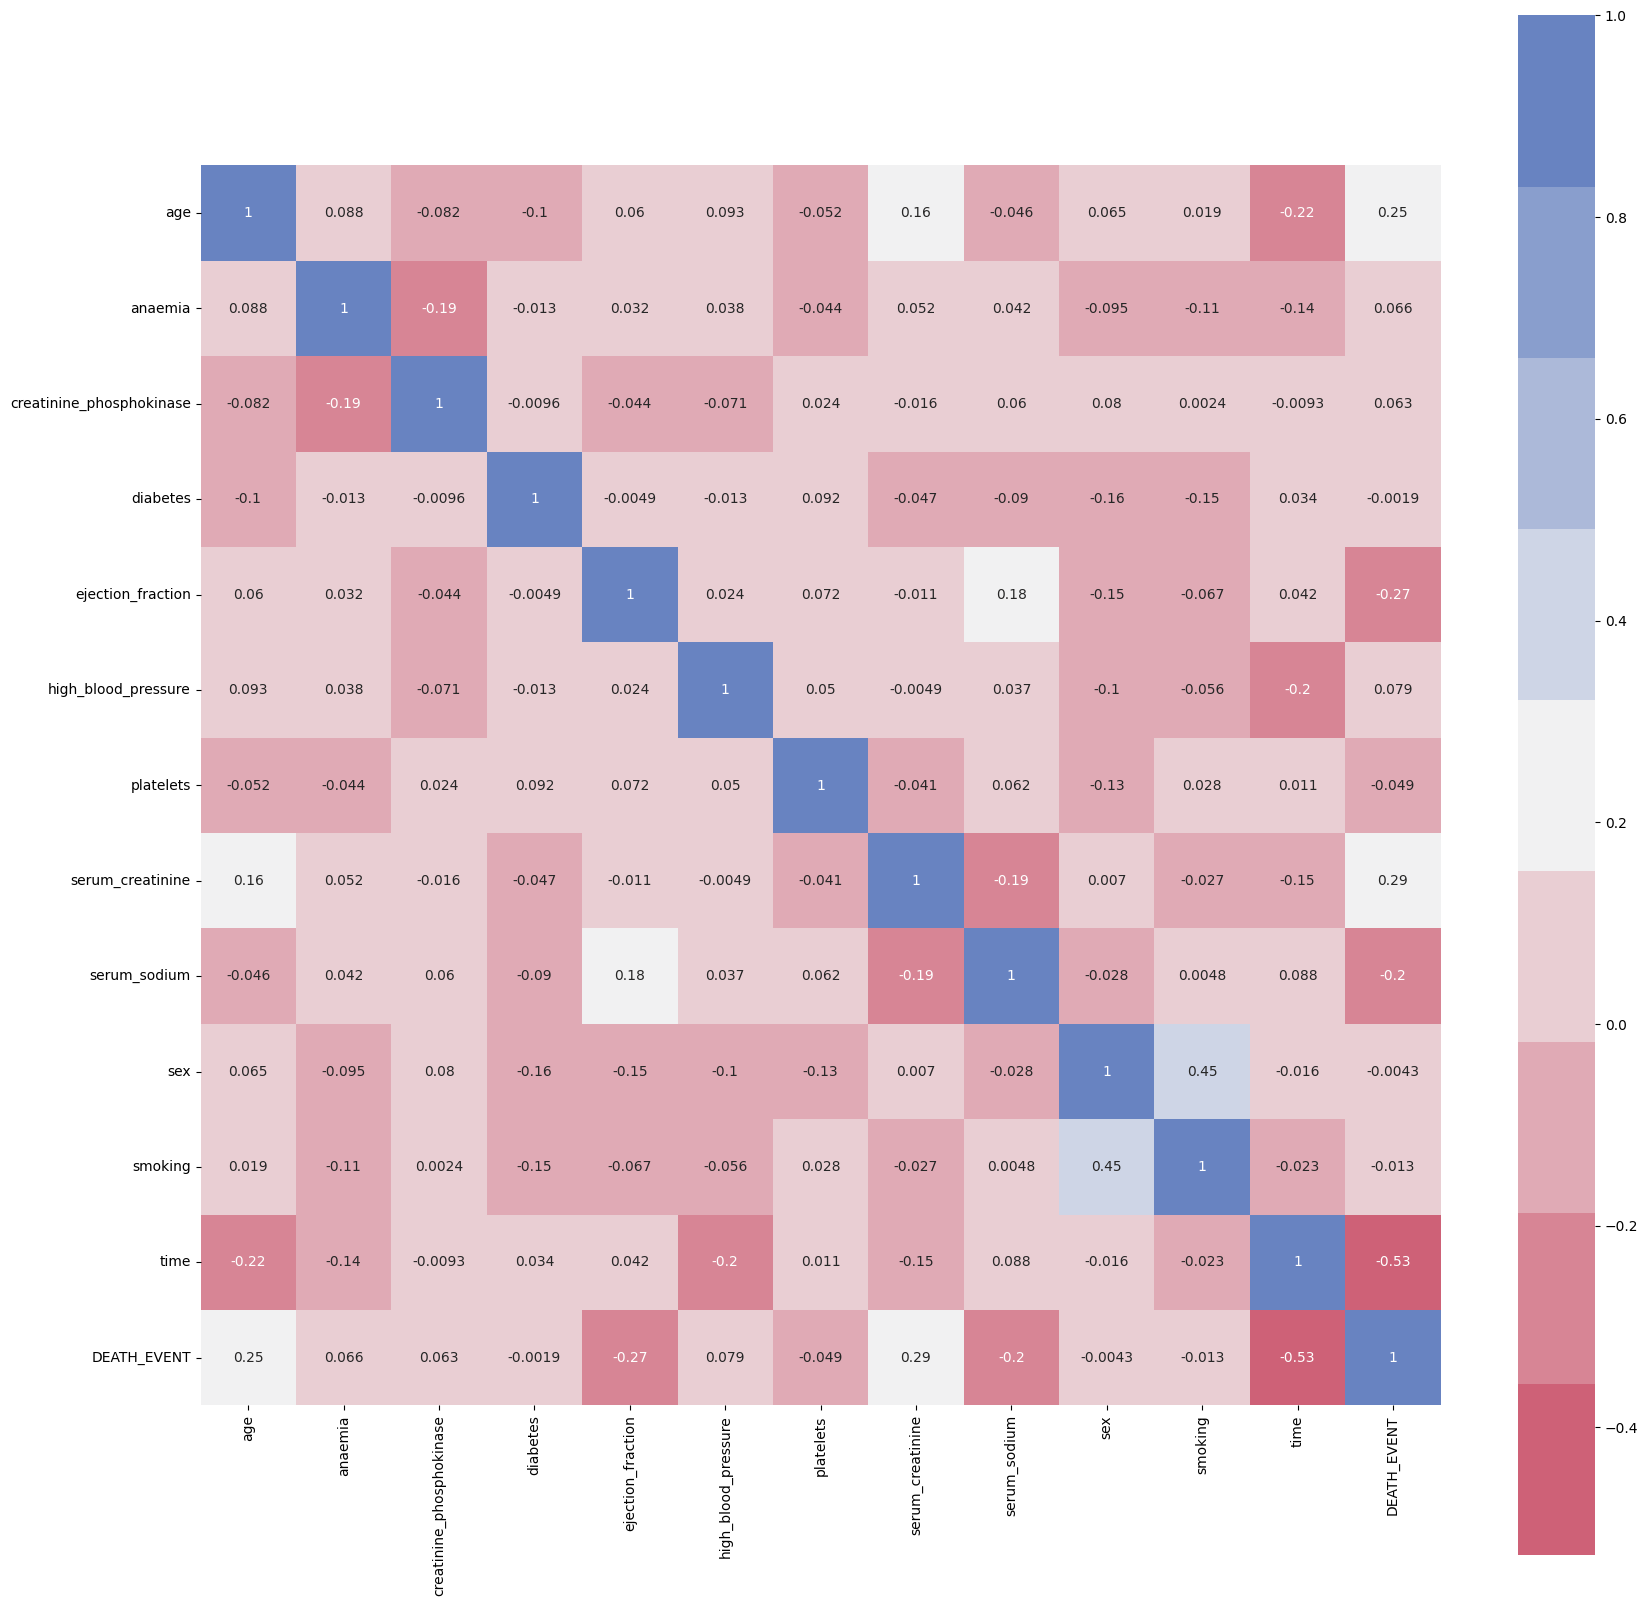

In [100]:
cmap = sns.diverging_palette(2, 255, s=50, l=55, n=9)
corrmat = data_fr.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

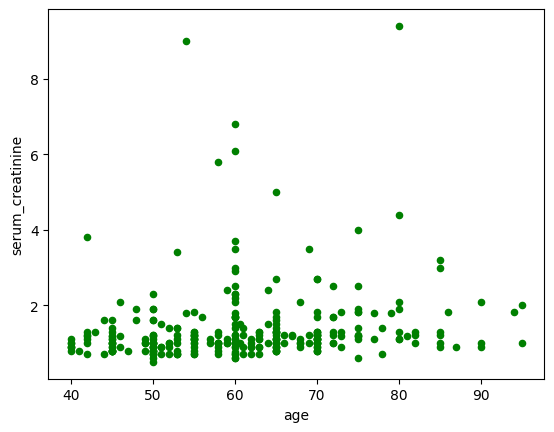

In [101]:
ax1 = data_fr.plot.scatter(x='age',
                      y='serum_creatinine',
                      c='Green')
                      

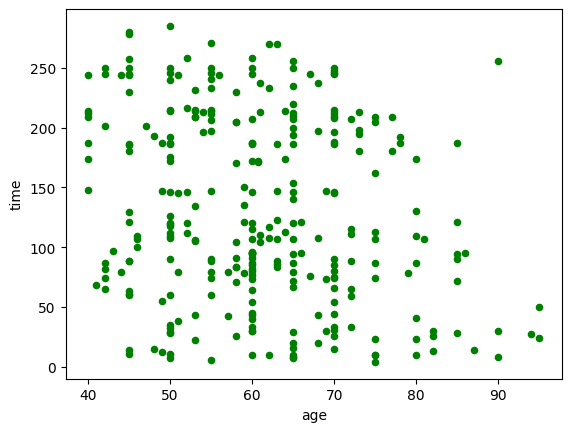

In [102]:
ax1 = data_fr.plot.scatter(x='age',
                      y='time',
                      c='Green')

Text(0.5, 1.0, 'Distribution Of Age')

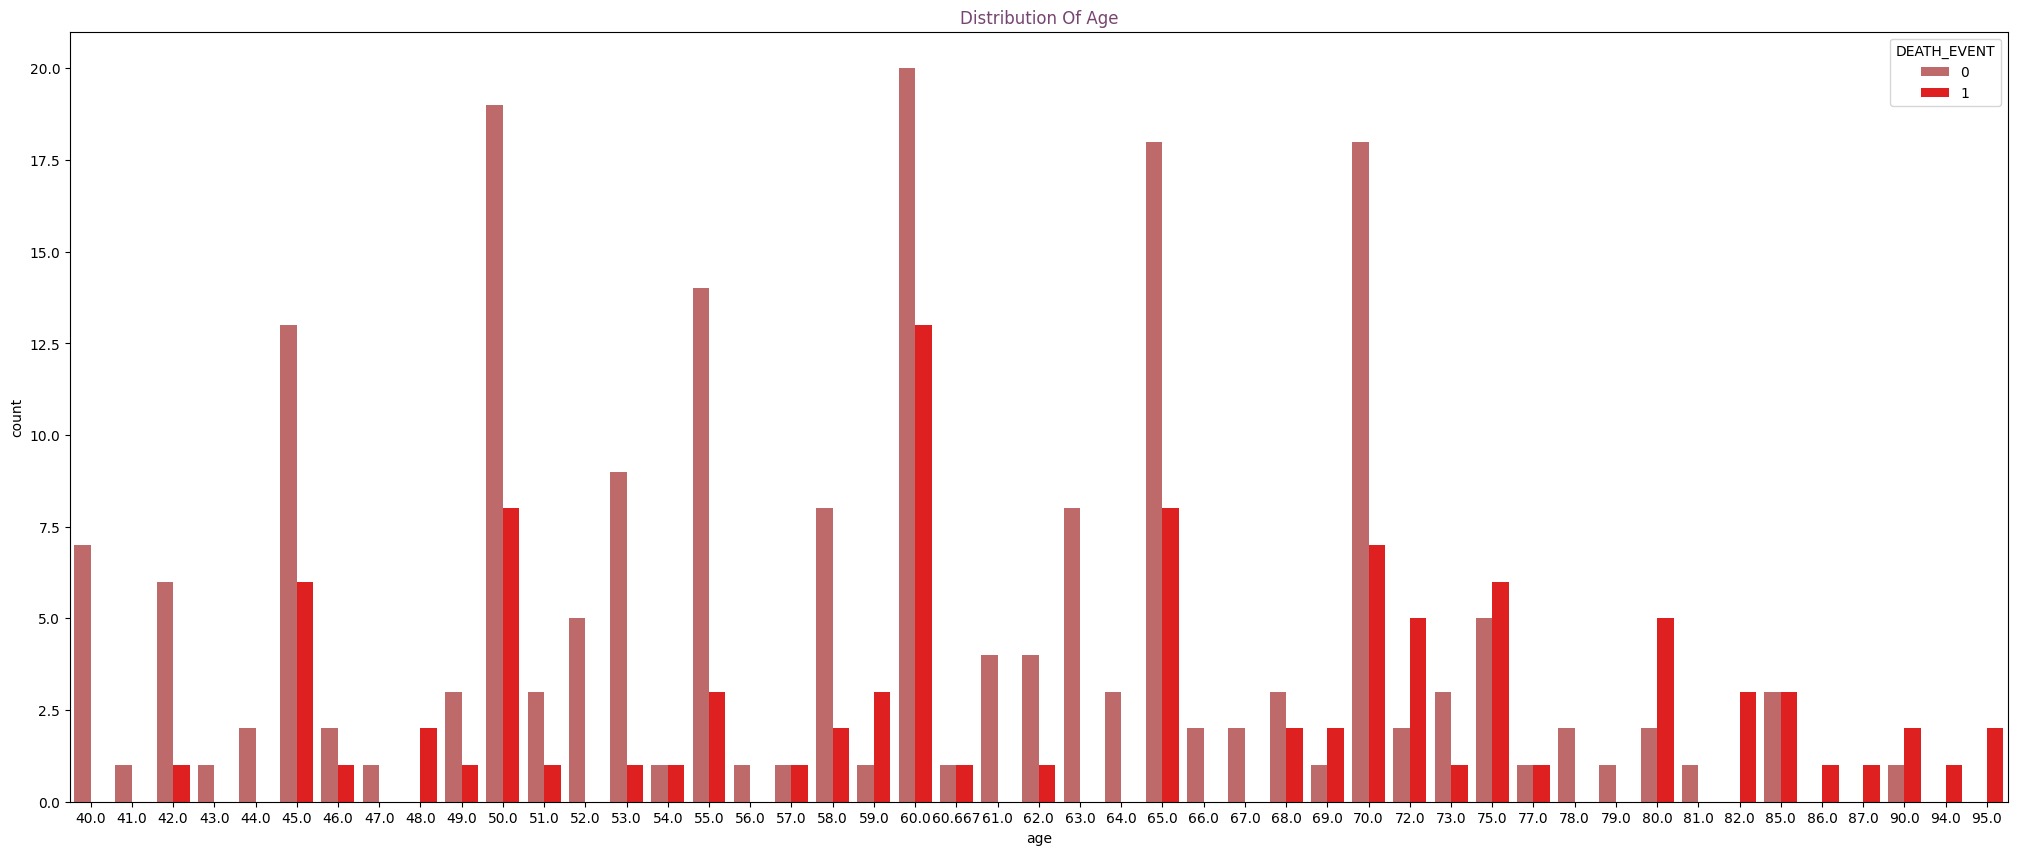

In [103]:
plt.figure(figsize=(25,10))
Days_of_week=sns.countplot(x=data_fr['age'],data=data_fr, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

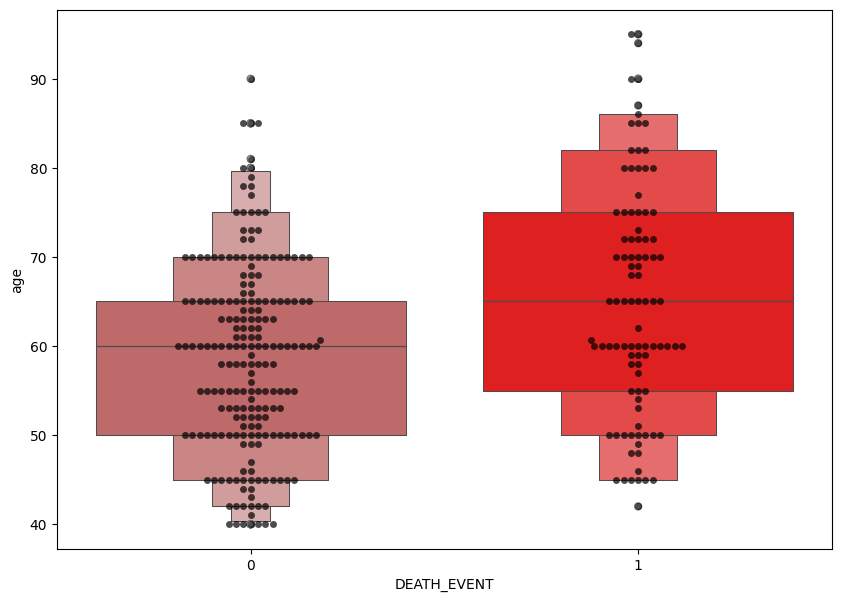

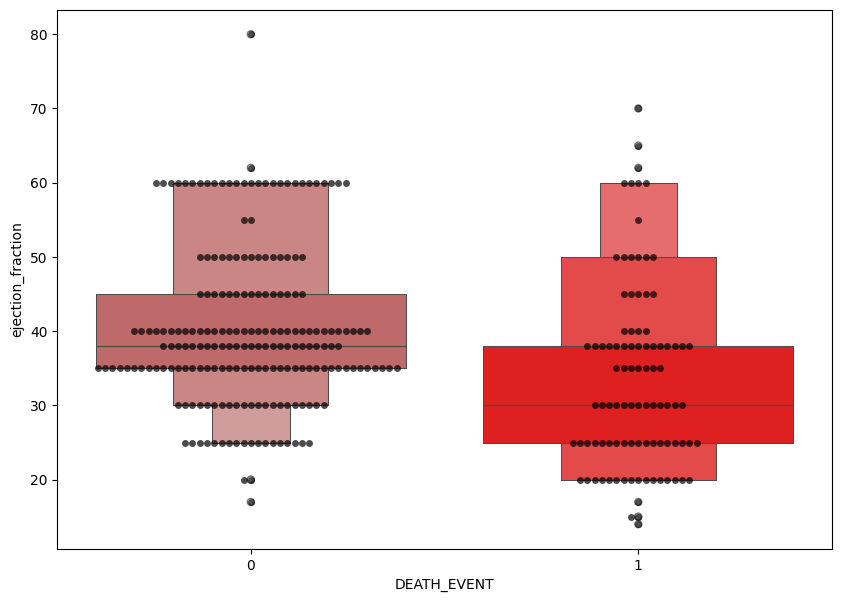

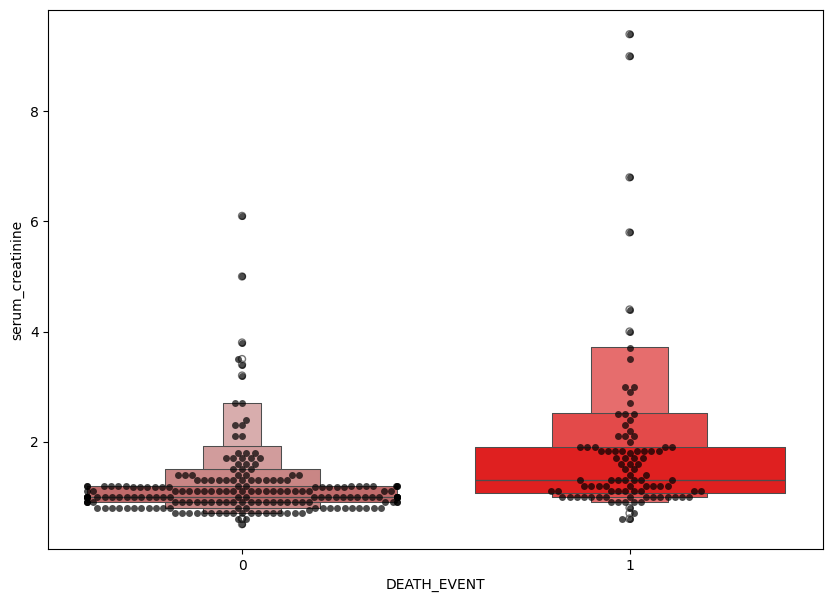

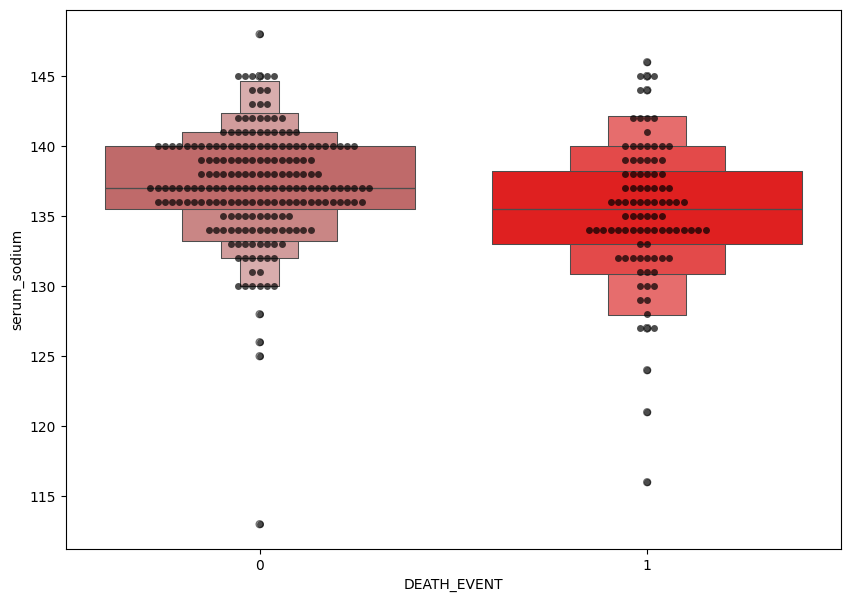

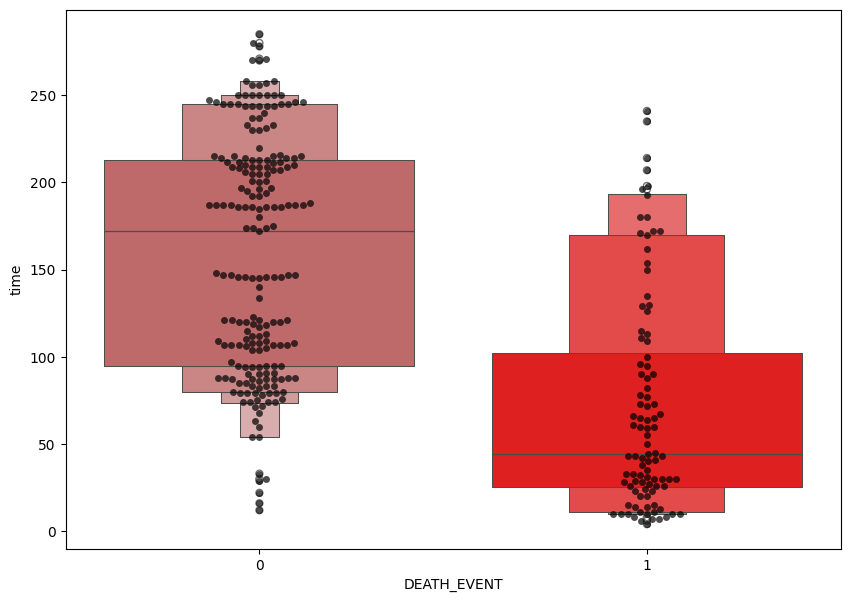

In [104]:
feature = ["age","ejection_fraction","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_fr["DEATH_EVENT"], y=data_fr[i], color="black", alpha=0.7)
    sns.boxenplot(x=data_fr["DEATH_EVENT"], y=data_fr[i], palette=cols)
    plt.show() 

<Axes: xlabel='time', ylabel='age'>

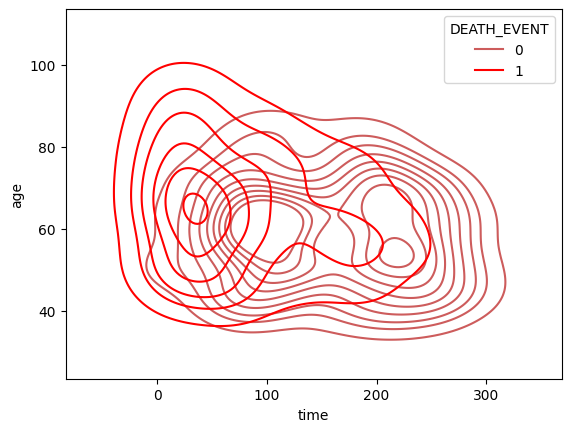

In [105]:
sns.kdeplot(x=data_fr["time"], y=data_fr["age"], hue =data_fr["DEATH_EVENT"], palette=cols)

In [106]:
X=data_fr.drop(["DEATH_EVENT"],axis=1)
# X=X.drop(["diabetes"],axis=1)
X=X.drop(["sex"],axis=1)
# X=X.drop(["smoking"],axis=1)
y=data_fr["DEATH_EVENT"]


In [107]:
col_names = list(X.columns)
X_scaled = preprocessing.StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-0.687682,-1.577879


In [108]:
X_scaled.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time
count,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.703353e-16,1.009969e-16,0.000000,9.060014e-17,-3.267546e-17,0.000000,7.723291e-17,1.425838e-16,-8.673849e-16,-1.188199e-17,-1.901118e-16
std,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-8.711048e-01,-0.576918,-8.475794e-01,-2.038387e+00,-0.735688,-2.440155e+00,-8.655094e-01,-5.363206e+00,-6.876819e-01,-1.629502e+00
25%,-8.281242e-01,-8.711048e-01,-0.480393,-8.475794e-01,-6.841802e-01,-0.735688,-5.208700e-01,-4.782047e-01,-5.959961e-01,-6.876819e-01,-7.389995e-01
50%,-7.022315e-02,-8.711048e-01,-0.342574,-8.475794e-01,-7.076750e-03,-0.735688,-1.390846e-02,-2.845524e-01,8.503384e-02,-6.876819e-01,-1.969543e-01
75%,7.718891e-01,1.147968e+00,0.000166,1.179830e+00,5.853888e-01,1.359272,4.111199e-01,5.926150e-03,7.660638e-01,1.454161e+00,9.387595e-01
max,2.877170e+00,1.147968e+00,7.514640,1.179830e+00,3.547716e+00,1.359272,6.008180e+00,7.752020e+00,2.582144e+00,1.454161e+00,1.997038e+00


In [109]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=25)

In [110]:
model1=svm.SVC(kernel="linear",C = 1)
model1.fit (X_train, y_train)
y_pred = model1.predict(X_test)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.89      0.76      0.82        21

    accuracy                           0.88        60
   macro avg       0.88      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60



In [112]:
print(confusion_matrix(y_test, y_pred))

[[37  2]
 [ 5 16]]


In [113]:
f1_score(y_test, y_pred)

0.8205128205128205

<Axes: >

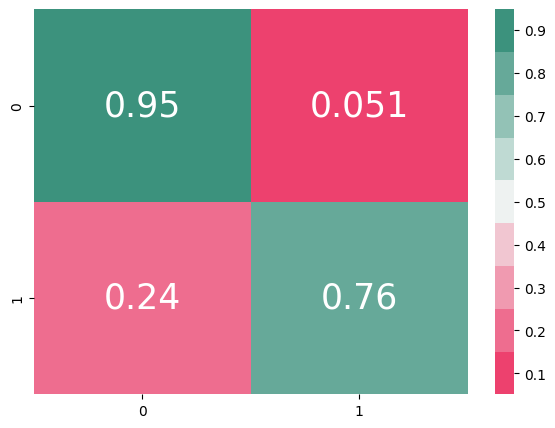

In [114]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(7,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix,axis=1, keepdims=True), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [115]:
y_score = model1.decision_function(X_test)

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label = 1)

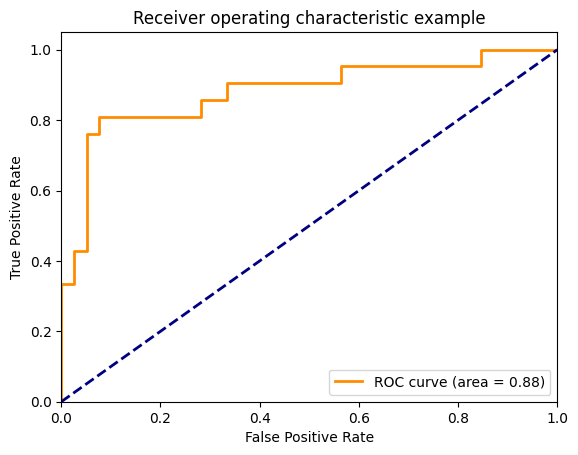

In [117]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()